# ĐỀ THI THỬ THỰC HÀNH NHẬP MÔN XỬ LÝ ẢNH


## Câu 1 (2 Điểm): Cho ảnh có tên là a.jpg và thực hiện các yêu cầu:
- Viết chương trình sử dụng mean filter cho ảnh (0.5 Điểm)
- Viết chương trình sử dụng filter xác định biên của hình ảnh trên(0.5 Điểm)
- Viết chương trình đổi màu ảnh từ không gian màu BGR sang một màu ngẫu nhiên (RGB) bằng cách thay đổi các kênh màu một cách ngẫu nhiên, sau đó lưu hình mới vào file a_random_color.jpg(0.5 Điểm)
- Chuyển ảnh sang không gian màu HSV và tách riêng kênh Hue, Saturation, Value để lưu thành ba ảnh grayscale tương ứng (a_hue.jpg, a_saturation.jpg, a_value.jpg) (0.5 Điểm)

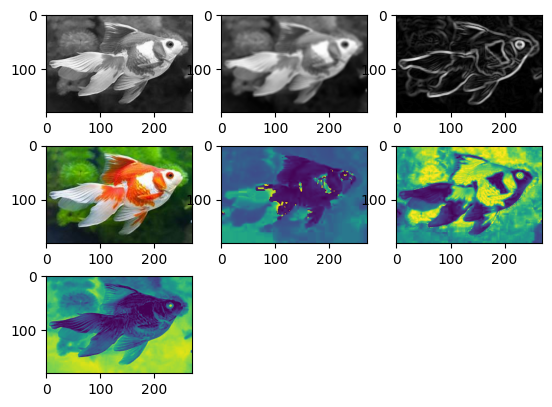

In [92]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pylab as plt
from skimage import filters
import random
import colorsys
#Viết chương trình sử dụng mean filter cho ảnh (0.5 Điểm)
a = iio.imread('a.jpg',  mode = "F")
k = np.ones((5, 5)) / 25
b = sn.convolve(a, k).astype(np.uint8)
#Viết chương trình sử dụng filter xác định biên của hình ảnh trên(0.5 Điểm)
c = filters.sobel(b)
c = (c * 255).astype(np.uint8)
#Viết chương trình đổi màu ảnh từ không gian màu BGR sang một màu ngẫu nhiên (RGB) bằng cách thay đổi các kênh màu một cách ngẫu nhiên, sau đó lưu hình mới vào file a_random_color.jpg
data = iio.imread("a.jpg")
kenh_mau = [0, 1, 2]
random.shuffle(kenh_mau)
bdata = data[:, :, kenh_mau]
iio.imsave("a_random_color.jpg", bdata )
#Chuyển ảnh sang không gian màu HSV và tách riêng kênh Hue, Saturation, Value để lưu thành ba ảnh grayscale tương ứng (a_hue.jpg, a_saturation.jpg, a_value.jpg
rgb = iio.imread("a.jpg")
rgb2hsv = np.vectorize(colorsys.rgb_to_hsv)
h,s,v = rgb2hsv(rgb[:,:,0], rgb[:,:,1], rgb[:,:,2])
h_img = (h * 255).astype(np.uint8)
s_img = (s * 255).astype(np.uint8)
v_img = (v * 255).astype(np.uint8)
iio.imwrite("a_hue.jpg", h_img)
iio.imwrite("a_saturation.jpg", s_img)
iio.imwrite("a_value.jpg", v_img)

plt.subplot(3,3,1)
plt.imshow(a, cmap = "gray")
plt.subplot(3,3,2)
plt.imshow(b, cmap = "gray")

plt.subplot(3,3,3)
plt.imshow(c, cmap = "gray")

plt.subplot(3,3,4)
plt.imshow(bdata)

plt.subplot(3, 3, 5)
plt.imshow(h_img)
plt.subplot(3, 3, 6)
plt.imshow(s_img)
plt.subplot(3, 3, 7)
plt.imshow(v_img)


plt.show()

## Câu 2 (4 Điểm): Viết một chương trình Python sử dụng OpenCV để tạo menu động cho phép người dùng chọn các phương pháp biến đổi ảnh từ một danh sách mở rộng, áp dụng cho nhiều ảnh cùng lúc, và thực hiện các phân tích bổ sung. Các yêu cầu cụ thể:
1. Tạo một menu động cho phép người dùng chọn các phương pháp biến đổi ảnh sau:
- Image inverse transformation(0.5 Điểm)
- Gamma-Correction (với giá trị gamma ngẫu nhiên từ 0.5 đến 2.0) (0.5 Điểm)
- Log Transformation (với hệ số nhân ngẫu nhiên từ 1.0 đến 5.0) (0.5 Điểm)
- Histogram equalization(0.5 Điểm)
- Contrast Stretching (tùy chỉnh với giá trị min và max ngẫu nhiên từ 0 đến 255) (0.5 Điểm)
- Adaptive Histogram Equalization (sử dụng CLAHE với ô lưới 8x8) (0.5 Điểm)
2. Chương trình phải xử lý đồng thời ba ảnh đầu vào có tên a.jpg, image2.jpg, và image2.jpg (0.5 Điểm)
3. Khi người dùng nhấn các phím sau, chương trình sẽ thực hiện biến đổi tương ứng trên cả ba ảnh (0.5 Điểm)
- Phím I: Image inverse transformation
- Phím G: Gamma-Correction
- Phím L: Log Transformation
- Phím H: Histogram equalization
- Phím C: Contrast Stretching
- Phím A: Adaptive Histogram Equalization
4. Đối với mỗi biến đổi, lưu kết quả của từng ảnh vào các file riêng biệt với tên định dạng output_[phương pháp]_[số ảnh].jpg (ví dụ: output_inverse_1.jpg, output_gamma_2.jpg).

Chọn phương pháp biến đổi ảnh:
1. Image inverse transformation
2. Gamma Correction
3. Log Transformation
4. Histogram Equalization
5. Contrast Stretching
6. Adaptive Histogram Equalization
4 255
1 255
0 255


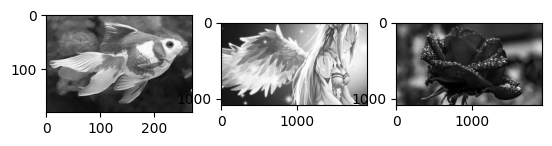

In [101]:
import random
from PIL import Image 
import math
import scipy
import cv2
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

print("Chọn phương pháp biến đổi ảnh:")
print("1. Image inverse transformation")
print("2. Gamma Correction")
print("3. Log Transformation")
print("4. Histogram Equalization")
print("5. Contrast Stretching")
print("6. Adaptive Histogram Equalization")

lua_chon = input("Nhập số (1–6): ")

for i, name in enumerate(["a.jpg", "image2.jpg", "image3.jpg"], start=1):
    if lua_chon == '1':
        img = Image.open(name).convert("L")
        im_1 = np.asarray(img)
        img_2 = 255 - im_1
        new_img = Image.fromarray(img_2)
        plt.subplot(1,3,i)
        plt.imshow(new_img, cmap = "gray")

    elif lua_chon == '2':
        img = Image.open(name).convert("L")
        im_3 = np.asarray(img)
        gamma = 0.5
        b1 = im_3.astype(float)
        b2 = np.max(b1)
        b3 = b1/b2
        c = (np.exp(b3) * 255.0).astype(np.uint8) 
        d = Image.fromarray(c)
        plt.subplot(1,3,i)
        plt.imshow(d, cmap = "gray")

    elif lua_chon == '3':
        img = Image.open(name).convert("L")
        im_4 = np.asarray(img)
        gamma = 0.5
        b = im_4.astype(float)
        b_1 = np.max(b)
        c1 = (128.0 * np.log(1 + b)) / np.log(1 + b_1)
        c2 = np.clip(c1, 0, 255).astype(np.uint8)
        d1 = Image.fromarray(c2)
        plt.subplot(1,3,i)
        plt.imshow(d1, cmap = "gray")

    elif lua_chon == '4':
        img = Image.open(name).convert('L')
        im1 = np.asarray(img)
        b1 = im1.flatten()
        hist, bins = np.histogram(im1, 256, [0, 255])
        cdf = hist.cumsum()
        cdf_m = np.ma.masked_equal(cdf, 0)
        num_cdf = (cdf_m - cdf_m.min()) * 255
        den_cdf = (cdf_m.max() - cdf_m.min())
        cdf = num_cdf / den_cdf
        cdf = np.ma.filled(cdf, 0).astype('uint8')
        im2 = cdf[b1]
        im3 = np.reshape(im2, im1.shape)
        im4 = Image.fromarray(im3)
        plt.subplot(1,3,i)
        plt.imshow(im4, cmap="gray")

    elif lua_chon == '5':
        img = Image.open(name).convert('L')
        im1 = np.asarray(img)
        b = im1.max()
        a = im1.min()
        print(a,b)
        c = im1.astype(float)
        im2 = 255 * (c - a) / (b - a)
        im3 = Image.fromarray(im2.astype(np.uint8))
        plt.subplot(1,3,i)
        plt.imshow(im3, cmap="gray")

    elif lua_chon == '6':
        img = cv2.imread(name, 0)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        result = clahe.apply(img)
        plt.subplot(1,3,i)
        plt.imshow(result, cmap='gray')
    else:
        print("lựa chọn của bạn không có trong các lựa chọn xử lý ảnh")
        break
plt.show()


3. Khi người dùng nhấn các phím sau, chương trình sẽ thực hiện biến đổi tương ứng trên cả ba ảnh (0.5 Điểm)
- Phím I: Image inverse transformation
- Phím G: Gamma-Correction
- Phím L: Log Transformation
- Phím H: Histogram equalization
- Phím C: Contrast Stretching
- Phím A: Adaptive Histogram Equalization
4. Đối với mỗi biến đổi, lưu kết quả của từng ảnh vào các file riêng biệt với tên định dạng output_[phương pháp]_[số ảnh].jpg (ví dụ: output_inverse_1.jpg, output_gamma_2.jpg).

Nhấn phím để chọn phương pháp biến đổi:
I - Inverse
G - Gamma Correction
L - Log Transformation
H - Histogram Equalization
C - Contrast Stretching
A - Adaptive Histogram Equalization


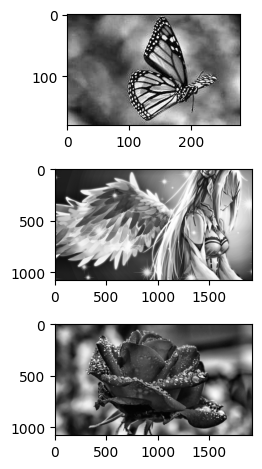

In [100]:
import random
from PIL import Image 
import math
import scipy
import cv2
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

print("Nhấn phím để chọn phương pháp biến đổi:")
print("I - Inverse")
print("G - Gamma Correction")
print("L - Log Transformation")
print("H - Histogram Equalization")
print("C - Contrast Stretching")
print("A - Adaptive Histogram Equalization")

key = input("Nhập phím (I, G, L, H, C, A): ").upper()

for i in range(1, 4):
    filename = f"image{i}.jpg"
    if key == 'I':
        img = Image.open(filename).convert("L")
        im_1 = np.asarray(img)
        img_2 = 255 - im_1
        new_img = Image.fromarray(img_2)
        new_img.save(f"output_inverse_{i}.jpg")
        plt.subplot(3, 1, i)
        plt.imshow(new_img, cmap="gray")

    elif key == 'G':
        img = Image.open(filename).convert("L")
        im_3 = np.asarray(img)
        gamma = 0.5
        b1 = im_3.astype(float)
        b2 = np.max(b1)
        b3 = b1 / b2
        c = (np.power(b3, gamma) * 255.0).astype(np.uint8) 
        d = Image.fromarray(c)
        d.save(f"output_gamma_{i}.jpg")
        plt.subplot(3, 1, i)
        plt.imshow(d, cmap="gray")

    elif key == 'L':
        img = Image.open(filename).convert("L")
        im_4 = np.asarray(img)
        b = im_4.astype(float)
        b_1 = np.max(b)
        c1 = (128.0 * np.log(1 + b)) / np.log(1 + b_1)
        c2 = np.clip(c1, 0, 255).astype(np.uint8)
        d1 = Image.fromarray(c2)
        d1.save(f"output_log_{i}.jpg")
        plt.subplot(3, 1, i)
        plt.imshow(d1, cmap="gray")

    elif key == 'H':
        img = Image.open(filename).convert('L')
        im1 = np.asarray(img)
        b1 = im1.flatten()
        hist, bins = np.histogram(im1, 256, [0, 255])
        cdf = hist.cumsum()
        cdf_m = np.ma.masked_equal(cdf, 0)
        num_cdf = (cdf_m - cdf_m.min()) * 255
        den_cdf = (cdf_m.max() - cdf_m.min())
        cdf = num_cdf / den_cdf
        cdf = np.ma.filled(cdf, 0).astype('uint8')
        im2 = cdf[b1]
        im3 = np.reshape(im2, im1.shape)
        im4 = Image.fromarray(im3)
        im4.save(f"output_histogram_{i}.jpg")
        plt.subplot(3, 1, i)
        plt.imshow(im4, cmap="gray")

    elif key == 'C':
        img = Image.open(filename).convert('L')
        im1 = np.asarray(img)
        b = im1.max()
        a = im1.min()
        c = im1.astype(float)
        im2 = 255 * (c - a) / (b - a)
        im3 = Image.fromarray(im2.astype(np.uint8))
        im3.save(f"output_contrast_{i}.jpg")
        plt.subplot(3, 1, i)
        plt.imshow(im3, cmap="gray")

    elif key == 'A':
        img = cv2.imread(filename, 0)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        result = clahe.apply(img)
        cv2.imwrite(f"output_adaptive_{i}.jpg", result)
        plt.subplot(3, 1, i)
        plt.imshow(result, cmap='gray')

    else:
        print("Lựa chọn không hợp lệ.")
        break

plt.tight_layout()
plt.show()


## Câu 3 (4 Điểm): Viết một chương trình Python sử dụng OpenCV để xử lý ba ảnh: colorful-ripe-tropical-fruits.jpg, quang-ninh.jpg, và pagoda.jpg với các phương pháp biến đổi và tiền xử lý nâng cao.
- Tăng kích thước ảnh colorful-ripe-tropical-fruits.jpg thêm 30 pixel ở cả chiều rộng và chiều cao. (0.5 Điểm)
- Xoay ảnh quang-ninh.jpg 45 độ theo chiều kim đồng hồ và lật ngang. (0.5 Điểm)
- Tăng kích thước ảnh pagoda.jpg lên 5 lần và áp dụng Gaussian blur với kernel 7x7 để làm mịn. (0.5 Điểm)
- Ứng dụng công thức bên dưới cho ảnh pagoda.jpg (1.5 Điểm)

(1414, 2119, 3)
(1444, 2149, 3)
(605, 1021)
Kích thước Pagoda gốc: (348, 600, 3)
Kích thước Pagoda sau khi phóng to: (1740, 3000, 3)


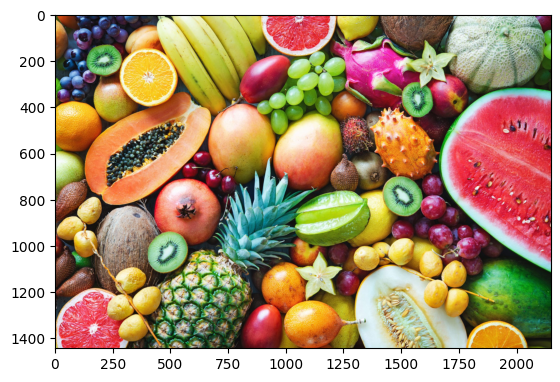

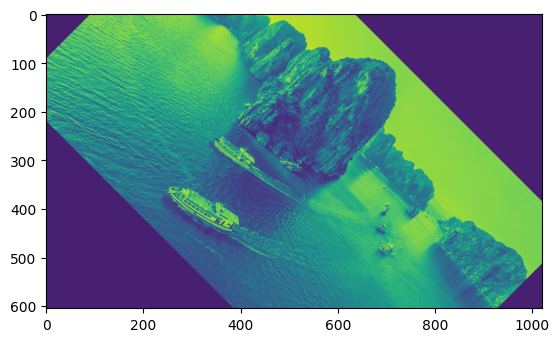

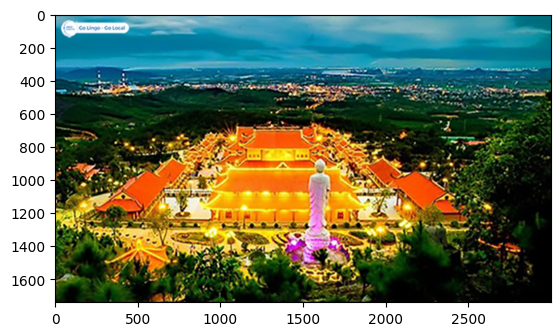

In [95]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

data = iio.imread("colorful-ripe-tropical-fruits.jpg")
print(data.shape)
bdata = nd.zoom(data, (1.0212, 1.0142, 1))
print(bdata.shape)

data = iio.imread("quang_ninh.jpg", mode = "F")
print(data.shape)
d1 = nd.rotate(data, 45)
d2 = np.fliplr(nd.rotate(data, 45, reshape=False))

data = iio.imread("pagoda.jpg")
print("Kích thước Pagoda gốc:", data.shape)
z_data = nd.zoom(data, (5, 5, 1))
z_data = nd.gaussian_filter(z_data, sigma=(1.5, 1.5, 0))
print("Kích thước Pagoda sau khi phóng to:", z_data.shape)

plt.imshow(bdata)
plt.show()
plt.imshow(d2)
plt.show()
plt.imshow(z_data)
plt.show()